In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\train_set.csv")

In [3]:
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
data.shape

(245725, 11)

In [5]:
data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [7]:
# Dropping the "ID" column as it is not useful in the analysis

In [8]:
data = data.drop(columns="ID", axis=1)
data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


## Exploratory Data Analysis

In [9]:
# Checking the NA values in the dataset

In [10]:
data.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

#### Only "Credit_Product" has missing values

In [11]:
percentage =(data["Credit_Product"].isna().sum()/len(data["Credit_Product"])) * 100
print("Missing values in the Credit_Product - ","%.2f" %percentage, "%")

Missing values in the Credit_Product -  11.93 %


### Numerical Variables in the data

In [12]:
numerical_variables = [feature for feature in data.columns if data[feature].dtype != "O"]

In [13]:
numerical_variables

['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']

In [14]:
del numerical_variables[3]

In [15]:
numerical_variables

['Age', 'Vintage', 'Avg_Account_Balance']

In [16]:
data[numerical_variables].head()

,Age,Vintage,Avg_Account_Balance
0,73,43,1045696
1,30,32,581988
2,56,26,1484315
3,34,19,470454
4,30,33,886787


In [17]:
data.nunique()

Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [18]:
data["Is_Lead"].unique()

array([0, 1], dtype=int64)

### Univariate Analysis

In [19]:
# Using histograms to analyze the distributions of the data

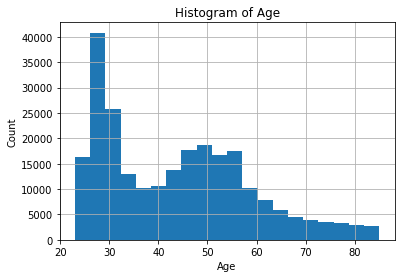

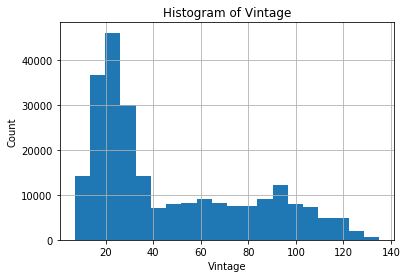

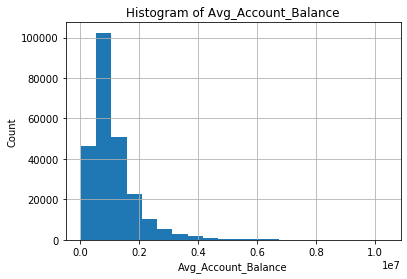

In [20]:
for feature in numerical_variables:
    data[feature].hist(bins=20)
    plt.title("Histogram of "+ feature)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

####  'Age', 'Vintage', 'Avg_Account_Balance' are not normally distributed but they right skewwed

In [21]:
# Boxplots to identify the outlier values

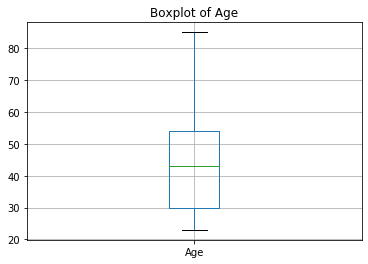

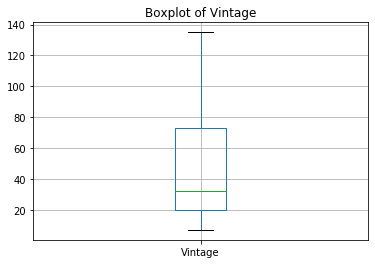

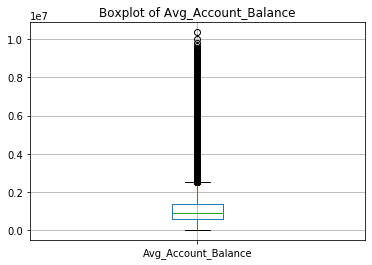

In [22]:
for feature in numerical_variables:
    data.boxplot(column = feature)
    plt.title("Boxplot of "+ feature)
    plt.show()

#### There are lot of outliers in the 'Avg_Account_Balance'

In [23]:
dataset = data

In [24]:
# Identifying the outliers using IQR method

In [25]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

In [26]:
# Number of outliers in the variable

In [27]:
((dataset < (Q1 - 3 * IQR)) | (dataset > (Q3 + 3 * IQR))).sum()

Age                        0
Avg_Account_Balance     5028
Channel_Code               0
Credit_Product             0
Gender                     0
Is_Active                  0
Is_Lead                58288
Occupation                 0
Region_Code                0
Vintage                    0
dtype: int64

#### There are many outliers in the "Avg_Account_Balance"

In [28]:
IQR_data = dataset["Avg_Account_Balance"].quantile(0.75) - dataset["Avg_Account_Balance"].quantile(0.25)
lower_bridge = dataset["Avg_Account_Balance"].quantile(0.25) - (IQR_data * 3)
upper_bridge = dataset["Avg_Account_Balance"].quantile(0.75) + (IQR_data * 3)
print(lower_bridge,'\n',upper_bridge)

-1682758.0 
 3653734.0


In [29]:
dataset["Is_Lead"].unique()

array([0, 1], dtype=int64)

In [30]:
dataset.loc[dataset["Avg_Account_Balance"]> upper_bridge, "Avg_Account_Balance"] = upper_bridge

In [31]:
((dataset < (Q1 - 3 * IQR)) | (dataset > (Q3 + 3 * IQR))).sum()

Age                        0
Avg_Account_Balance        0
Channel_Code               0
Credit_Product             0
Gender                     0
Is_Active                  0
Is_Lead                58288
Occupation                 0
Region_Code                0
Vintage                    0
dtype: int64

### Bivariate Analysis

In [32]:
# Using boxplots to understand the relationship between the input numerical variables and output

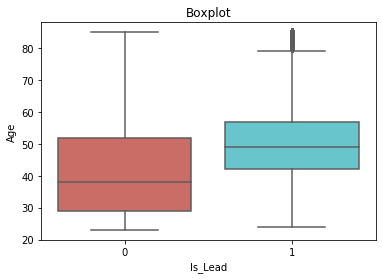

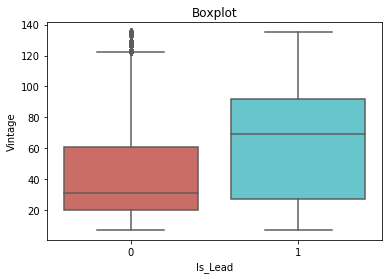

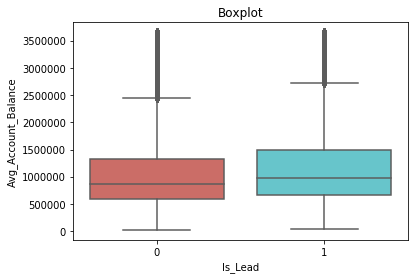

In [33]:
for feature in numerical_variables:
    sns.boxplot("Is_Lead", feature, data=dataset, palette="hls")
    plt.title("Boxplot")
    plt.show()

In [34]:
# Countplot of dependent variable

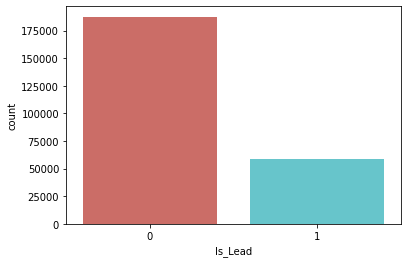

In [35]:
sns.countplot("Is_Lead", data= dataset, palette='hls')

In [36]:
dataset["Is_Lead"].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [37]:
inter = sum(dataset["Is_Lead"] == 1)/sum(dataset["Is_Lead"]==0) * 100
non_inter = 100 - inter

print("Interested customers", "%.2f" %inter, "%")
print("Not interested customers","%.2f" %non_inter, "%")

Interested customers 31.10 %
Not interested customers 68.90 %


### Categorical Variables

In [38]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == "O"]

In [39]:
categorical_features

['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [40]:
dataset[categorical_features].nunique()

Gender             2
Region_Code       35
Occupation         4
Channel_Code       4
Credit_Product     2
Is_Active          2
dtype: int64

### Univariate Analysis

In [41]:
# Using the countplots to observe the counts of each categorical variable

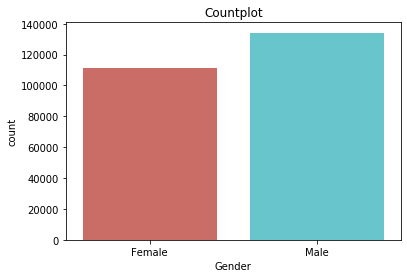

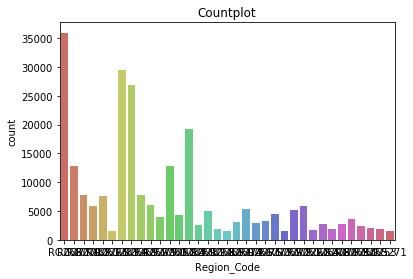

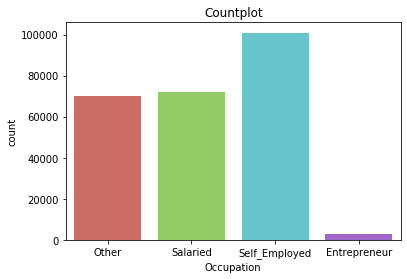

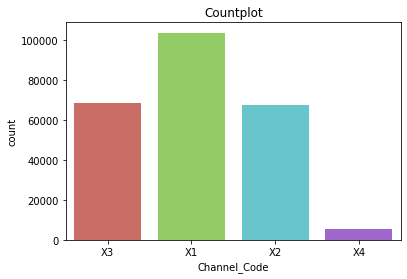

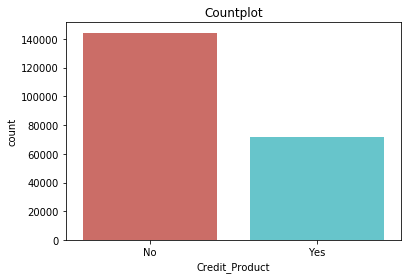

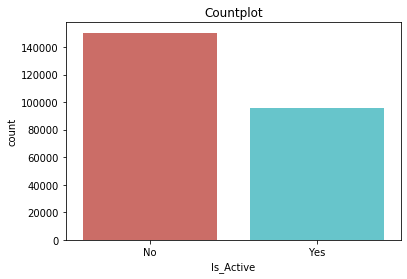

In [42]:
for feature in categorical_features:
    sns.countplot(feature, data = dataset, palette = "hls")
    plt.title("Countplot")
    plt.show()

### Bivariate analysis

In [43]:
# Cross-tabulation of independent varibales with respect to dependent variable

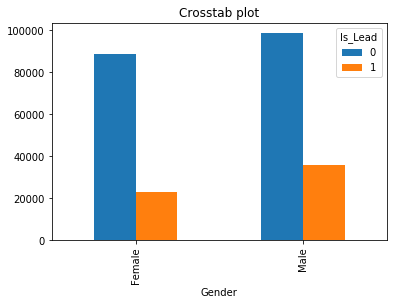

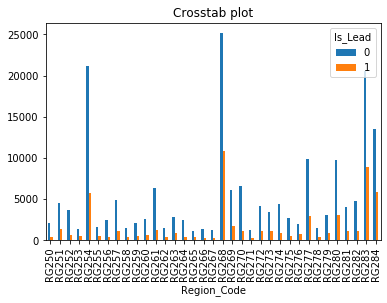

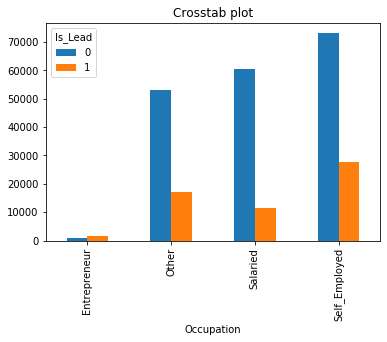

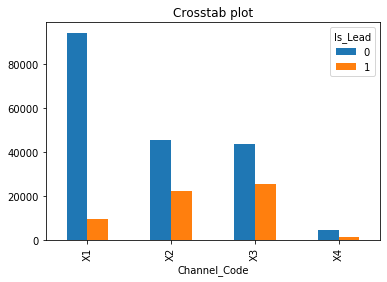

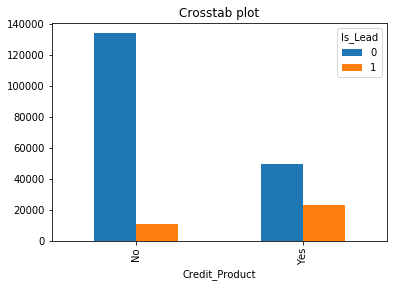

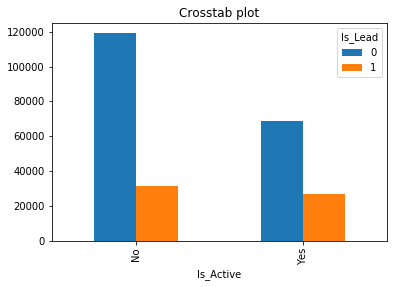

In [44]:
for feature in categorical_features:
    pd.crosstab(dataset[feature], dataset["Is_Lead"]).plot(kind="bar")
    plt.title("Crosstab plot")
    plt.show()

### Correlation Matrix

In [45]:
corr = dataset.corr()

In [46]:
corr

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.162095,0.230814
Vintage,0.631242,1.000000,0.186679,0.279642
Avg_Account_Balance,0.162095,0.186679,1.000000,0.062454
Is_Lead,0.230814,0.279642,0.062454,1.000000


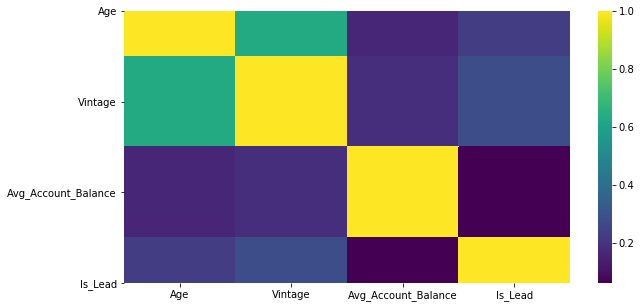

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, cbar = True, cmap ='viridis')

#### There is 63% correlation between "Age" and "Vintage"

### Handling missing values

In [48]:
dataset.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [49]:
dataset["Credit_Product"].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [50]:
dataset["Credit_Product"].unique()

array(['No', nan, 'Yes'], dtype=object)

#### Since the most frequent category is "No", the missing values are filled with the same

In [51]:
dataset["Credit_Product"].fillna("No", inplace= True)

In [52]:
dataset.isna().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

### Encoding the categorical variables

In [53]:
dataset[categorical_features].nunique()

Gender             2
Region_Code       35
Occupation         4
Channel_Code       4
Credit_Product     2
Is_Active          2
dtype: int64

In [54]:
categorical_features

['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [55]:
# Label encoding 'Region_Code' and 'Channel_Code'

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
encoder = LabelEncoder()

In [58]:
# Converting the tese two variables from object type to integer type by extracting numbers

In [59]:
def split_num(my_str):
    num = [x for x in my_str if x.isdigit()]
    num = "".join(num)

    if not num:
        num = None

    return num

In [60]:
Rgn = []
for i in dataset['Region_Code']:
    rgn = split_num(i)
    Rgn.append(rgn)
Rgn = pd.to_numeric(Rgn)

In [61]:
Chn = []
for i in dataset['Channel_Code']:
    chn = split_num(i)
    Chn.append(chn)
Chn = pd.to_numeric(Chn)

In [62]:
dataset['Region_Code'] = Rgn
dataset['Channel_Code'] = Chn

In [63]:
# Encoding other categorical variables

In [64]:
dataset = pd.get_dummies(dataset, columns=['Gender',
 'Occupation',
 'Credit_Product',
 'Is_Active'], drop_first = True)

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       245725 non-null  int64  
 1   Region_Code               245725 non-null  int64  
 2   Channel_Code              245725 non-null  int64  
 3   Vintage                   245725 non-null  int64  
 4   Avg_Account_Balance       245725 non-null  float64
 5   Is_Lead                   245725 non-null  int64  
 6   Gender_Male               245725 non-null  uint8  
 7   Occupation_Other          245725 non-null  uint8  
 8   Occupation_Salaried       245725 non-null  uint8  
 9   Occupation_Self_Employed  245725 non-null  uint8  
 10  Credit_Product_Yes        245725 non-null  uint8  
 11  Is_Active_Yes             245725 non-null  uint8  
dtypes: float64(1), int64(5), uint8(6)
memory usage: 12.7 MB


### Importing test dataset and applying same transformations

In [66]:
data_test = pd.read_csv(r"C:\Users\Admin\Downloads\test_set.csv")
data_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [67]:
data_test.shape

(105312, 10)

### Handling outliers

In [68]:
IQR_data = data_test["Avg_Account_Balance"].quantile(0.75) - data_test["Avg_Account_Balance"].quantile(0.25)
lower_bridge = data_test["Avg_Account_Balance"].quantile(0.25) - (IQR_data * 3)
upper_bridge = data_test["Avg_Account_Balance"].quantile(0.75) + (IQR_data * 3)
print(lower_bridge,'\n',upper_bridge)

-1698865.75 
 3674446.25


In [69]:
data_test.loc[data_test["Avg_Account_Balance"]> upper_bridge, "Avg_Account_Balance"] = upper_bridge

In [70]:
data_test.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [71]:
data_test['Credit_Product'].fillna("No", inplace = True)

### Encoding the categorical variables

In [72]:
data_test[categorical_features].nunique()

Gender             2
Region_Code       35
Occupation         4
Channel_Code       4
Credit_Product     2
Is_Active          2
dtype: int64

In [73]:
# Label encoding 'Region_Code' and 'Channel_Code'

In [74]:
encoder = LabelEncoder()

In [75]:
# Converting the tese two variables from object type to integer type by extracting numbers

In [76]:
Rgn = []
for i in data_test['Region_Code']:
    rgn = split_num(i)
    Rgn.append(rgn)
Rgn = pd.to_numeric(Rgn)

In [77]:
Chn = []
for i in data_test['Channel_Code']:
    chn = split_num(i)
    Chn.append(chn)
Chn = pd.to_numeric(Chn)

In [78]:
data_test['Region_Code'] = Rgn
data_test['Channel_Code'] = Chn

In [79]:
# Encoding other categorical variables

In [80]:
data_test = pd.get_dummies(data_test, columns=['Gender',
 'Occupation',
 'Credit_Product',
 'Is_Active'], drop_first = True)

In [81]:
data_test = data_test.drop(columns=["ID"])

In [82]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       105312 non-null  int64  
 1   Region_Code               105312 non-null  int64  
 2   Channel_Code              105312 non-null  int64  
 3   Vintage                   105312 non-null  int64  
 4   Avg_Account_Balance       105312 non-null  float64
 5   Gender_Male               105312 non-null  uint8  
 6   Occupation_Other          105312 non-null  uint8  
 7   Occupation_Salaried       105312 non-null  uint8  
 8   Occupation_Self_Employed  105312 non-null  uint8  
 9   Credit_Product_Yes        105312 non-null  uint8  
 10  Is_Active_Yes             105312 non-null  uint8  
dtypes: float64(1), int64(4), uint8(6)
memory usage: 4.6 MB


## Scaling

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()

In [85]:
dataset_input = dataset.drop(columns= ["Is_Lead"], axis = 1)

In [86]:
scaler.fit(dataset_input)

MinMaxScaler()

In [87]:
scaled_data = pd.DataFrame(scaler.transform(dataset_input), columns = dataset_input.columns)

In [88]:
scaled_data.head()

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Credit_Product_Yes,Is_Active_Yes
0,0.806452,0.529412,0.666667,0.281250,0.282114,0.0,1.0,0.0,0.0,0.0,0.0
1,0.112903,0.794118,0.000000,0.195312,0.154475,0.0,0.0,1.0,0.0,0.0,0.0
2,0.532258,0.529412,0.666667,0.148438,0.402848,0.0,0.0,0.0,1.0,0.0,1.0
3,0.177419,0.588235,0.000000,0.093750,0.123774,1.0,0.0,1.0,0.0,0.0,0.0
4,0.112903,0.941176,0.000000,0.203125,0.238373,0.0,0.0,1.0,0.0,0.0,0.0


In [89]:
# Scaling test data

In [90]:
scaler.fit(data_test)

MinMaxScaler()

In [91]:
scaled_test = pd.DataFrame(scaler.transform(data_test), columns = data_test.columns)

### Assigning Train and test

In [92]:
X_train = scaled_data
y_train = dataset["Is_Lead"]

In [93]:
X_test = scaled_test

In [94]:
X_train.shape, X_test.shape

((245725, 11), (105312, 11))

## Model Building

### Logisitic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
classifier = LogisticRegression(max_iter = 200)

In [97]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [98]:
classifier.coef_

array([[ 1.06790870e+00,  1.75055349e-01,  1.21597430e+00,
         1.42450370e+00, -1.18411649e-03,  1.15434742e-01,
        -1.66364962e+00, -9.33533668e-01, -1.38304897e+00,
         3.89703847e-01,  1.18904081e-01]])

In [99]:
classifier.predict_proba(X_train)

array([[0.73312709, 0.26687291],
       [0.87075552, 0.12924448],
       [0.748982  , 0.251018  ],
       ...,
       [0.89728696, 0.10271304],
       [0.87801557, 0.12198443],
       [0.87795775, 0.12204225]])

In [100]:
classifier.predict_proba(X_test)

array([[0.91388668, 0.08611332],
       [0.85348636, 0.14651364],
       [0.88354996, 0.11645004],
       ...,
       [0.69258171, 0.30741829],
       [0.6559421 , 0.3440579 ],
       [0.89000706, 0.10999294]])

In [101]:
pred = classifier.predict_proba(X_test)[:,1]

In [102]:
from sklearn import metrics

In [103]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

In [104]:
# ROC curve

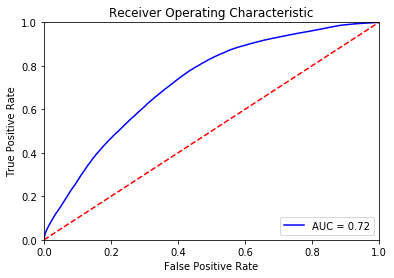

In [105]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
pred = classifier.predict_proba (X_test) [:,1]

In [107]:
pred = pd.DataFrame(pred)

In [108]:
pred.head()

,0
0,0.086113
1,0.146514
2,0.116450
3,0.071089
4,0.054601


### Random Forest Model

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
clf = RandomForestClassifier(n_estimators=1000, max_depth = 4, min_samples_split=3)

In [111]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=3, n_estimators=1000)

In [112]:
y_pred_tr = clf.predict_proba(X_train)

In [113]:
y_pred_ts = clf.predict_proba(X_test)

In [114]:
# Calculating fpr and tpr for all thresholds

In [115]:
probs = clf.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

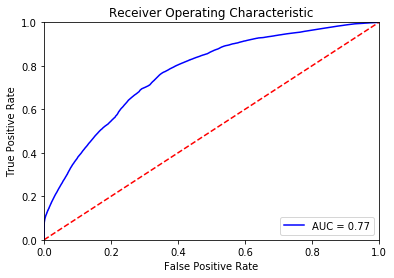

In [116]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [117]:
pred = clf.predict_proba (X_test) [:,1]

In [118]:
pred = pd.DataFrame(pred)
pred.head()

,0
0,0.089856
1,0.262720
2,0.076726
3,0.065756
4,0.063695


In [119]:
# Get numerical feature importances
importances = list(clf.feature_importances_)

In [120]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train, importances)]

In [121]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [122]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Vintage              Importance: 0.34
Variable: Channel_Code         Importance: 0.25
Variable: Age                  Importance: 0.22
Variable: Occupation_Salaried  Importance: 0.1
Variable: Credit_Product_Yes   Importance: 0.03
Variable: Occupation_Self_Employed Importance: 0.02
Variable: Is_Active_Yes        Importance: 0.02
Variable: Occupation_Other     Importance: 0.01
Variable: Region_Code          Importance: 0.0
Variable: Avg_Account_Balance  Importance: 0.0
Variable: Gender_Male          Importance: 0.0


### XG Boost Model

In [123]:
from xgboost import XGBClassifier

C:\Users\Admin\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [124]:
model = XGBClassifier(booster = 'gbtree', n_estimators = 1000, reg_alpha = 1 )

In [125]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
y_train_pred = model.predict_proba(X_train)

In [127]:
y_pred = model.predict_proba(X_test)

In [128]:
y_pred

array([[0.970385  , 0.02961498],
       [0.7781678 , 0.22183223],
       [0.8655994 , 0.13440058],
       ...,
       [0.52443624, 0.47556376],
       [0.5428611 , 0.45713887],
       [0.96446323, 0.03553678]], dtype=float32)

In [129]:
probs = model.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

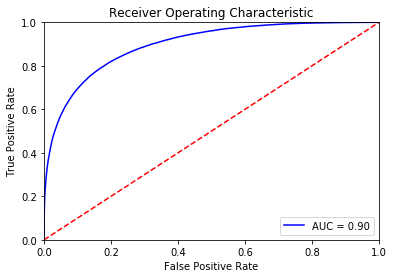

In [130]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [131]:
pred = model.predict_proba (X_test) [:,1]

In [132]:
pred = pd.DataFrame(pred)
pred.head()

,0
0,0.029615
1,0.221832
2,0.134401
3,0.014273
4,0.023708


### XG Boost hyperparameter tuning

In [133]:
clf = XGBClassifier(objective="binary:logistic")

In [134]:
booster=['gbtree']
base_score=[0.3, 0.5]

In [135]:
n_estimators = [500, 800]
max_depth = [4, 5]
learning_rate=[0.1,0.2]

In [136]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'booster':booster,
    'base_score':base_score
    }

In [137]:
from sklearn.model_selection import RandomizedSearchCV

In [138]:
# Set up the random search with 3-fold cross validation
random_cv = RandomizedSearchCV(estimator=clf,
            param_distributions=hyperparameter_grid,
            cv=3, n_iter=10,
            scoring = 'roc_auc',n_jobs = 3,
            verbose = 5, 
            return_train_score = True,
            random_state=24)

In [139]:
random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 10.6min
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed: 284.2min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [140]:
random_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1,  monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [142]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
y_train_pred = classifier.predict_proba(X_train)

In [144]:
y_pred = classifier.predict_proba(X_test)

In [145]:
y_pred

array([[0.9614975 , 0.03850252],
       [0.7434517 , 0.25654826],
       [0.84330875, 0.15669124],
       ...,
       [0.46180326, 0.53819674],
       [0.4726274 , 0.5273726 ],
       [0.9269863 , 0.07301372]], dtype=float32)

In [146]:
probs = classifier.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

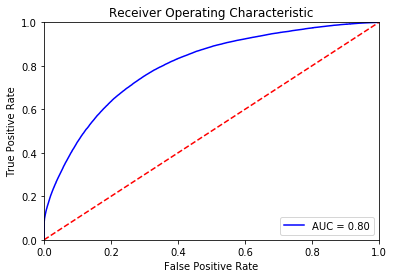

In [147]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [148]:
pred = classifier.predict_proba (X_test) [:,1]

In [149]:
pred = pd.DataFrame(pred)
pred.head()

,0
0,0.038503
1,0.256548
2,0.156691
3,0.032798
4,0.029701


### CatBoost Classfier with encoding

In [150]:
from catboost import CatBoostClassifier

In [151]:
model = CatBoostClassifier(n_estimators=1000, learning_rate =0.05, depth =4, eval_metric='AUC')

In [152]:
model.fit(X_train, y_train)

0:	total: 162ms	remaining: 2m 42s
1:	total: 234ms	remaining: 1m 56s
2:	total: 307ms	remaining: 1m 41s
3:	total: 382ms	remaining: 1m 35s
4:	total: 461ms	remaining: 1m 31s
5:	total: 538ms	remaining: 1m 29s
6:	total: 615ms	remaining: 1m 27s
7:	total: 688ms	remaining: 1m 25s
8:	total: 763ms	remaining: 1m 23s
9:	total: 836ms	remaining: 1m 22s
10:	total: 916ms	remaining: 1m 22s
11:	total: 994ms	remaining: 1m 21s
12:	total: 1.06s	remaining: 1m 20s
13:	total: 1.14s	remaining: 1m 19s
14:	total: 1.21s	remaining: 1m 19s
15:	total: 1.28s	remaining: 1m 18s
16:	total: 1.34s	remaining: 1m 17s
17:	total: 1.4s	remaining: 1m 16s
18:	total: 1.46s	remaining: 1m 15s
19:	total: 1.53s	remaining: 1m 15s
20:	total: 1.59s	remaining: 1m 14s
21:	total: 1.67s	remaining: 1m 14s
22:	total: 1.73s	remaining: 1m 13s
23:	total: 1.79s	remaining: 1m 12s
24:	total: 1.85s	remaining: 1m 12s
25:	total: 1.91s	remaining: 1m 11s
26:	total: 1.97s	remaining: 1m 10s
27:	total: 2.04s	remaining: 1m 10s
28:	total: 2.09s	remaining: 1m 

In [153]:
y_train_pred = model.predict_proba(X_train)

In [154]:
y_pred = model.predict_proba(X_test)

In [155]:
y_pred

array([[0.9561341 , 0.0438659 ],
       [0.74433444, 0.25566556],
       [0.91615845, 0.08384155],
       ...,
       [0.49734443, 0.50265557],
       [0.52092023, 0.47907977],
       [0.9330488 , 0.0669512 ]])

In [156]:
probs = model.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

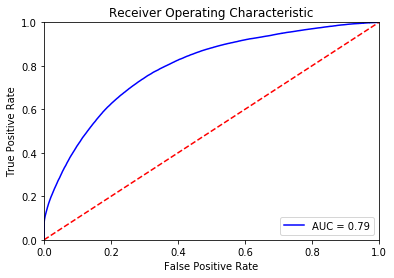

In [157]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [158]:
pred = model.predict_proba (X_test) [:,1]

In [159]:
pred = pd.DataFrame(pred)
pred.head()

,0
0,0.043866
1,0.255666
2,0.083842
3,0.035865
4,0.030387


### CatBoost Classifier without encoding

In [160]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\train_set.csv")

In [161]:
dataset = data

In [162]:
dataset.drop(["ID"], axis=1, inplace = True)

In [163]:
dataset.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


### Handling outliers

In [164]:
IQR_data = dataset["Avg_Account_Balance"].quantile(0.75) - dataset["Avg_Account_Balance"].quantile(0.25)
lower_bridge = dataset["Avg_Account_Balance"].quantile(0.25) - (IQR_data * 3)
upper_bridge = dataset["Avg_Account_Balance"].quantile(0.75) + (IQR_data * 3)
print(lower_bridge,'\n',upper_bridge)

-1682758.0 
 3653734.0


In [165]:
dataset.loc[dataset["Avg_Account_Balance"]> upper_bridge, "Avg_Account_Balance"] = upper_bridge

In [166]:
((dataset < (Q1 - 3 * IQR)) | (dataset > (Q3 + 3 * IQR))).sum()

Age                        0
Avg_Account_Balance        0
Channel_Code               0
Credit_Product             0
Gender                     0
Is_Active                  0
Is_Lead                58288
Occupation                 0
Region_Code                0
Vintage                    0
dtype: int64

### Handling missing values

In [167]:
dataset.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

#### Since the most frequent category is "No", the missing values are filled with the same

In [168]:
dataset["Credit_Product"].fillna("No", inplace= True)

In [169]:
dataset.isna().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [170]:
# Similar pre processing for test data

In [171]:
data_test = pd.read_csv(r"C:\Users\Admin\Downloads\test_set.csv")

In [172]:
data_test.drop(["ID"], axis=1, inplace = True)

In [173]:
data_test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


### Handling outliers

In [174]:
IQR_data = data_test["Avg_Account_Balance"].quantile(0.75) - data_test["Avg_Account_Balance"].quantile(0.25)
lower_bridge = data_test["Avg_Account_Balance"].quantile(0.25) - (IQR_data * 3)
upper_bridge = data_test["Avg_Account_Balance"].quantile(0.75) + (IQR_data * 3)
print(lower_bridge,'\n',upper_bridge)

-1698865.75 
 3674446.25


In [175]:
data_test.loc[data_test["Avg_Account_Balance"]> upper_bridge, "Avg_Account_Balance"] = upper_bridge

In [176]:
((data_test < (Q1 - 3 * IQR)) | (data_test > (Q3 + 3 * IQR))).sum()

Age                       0
Avg_Account_Balance    2256
Channel_Code              0
Credit_Product            0
Gender                    0
Is_Active                 0
Is_Lead                   0
Occupation                0
Region_Code               0
Vintage                   0
dtype: int64

### Handling missing values

In [177]:
data_test.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

#### Since the most frequent category is "No", the missing values are filled with the same

In [178]:
data_test["Credit_Product"].fillna("No", inplace= True)

In [179]:
data_test.isna().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [180]:
dataset.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696.0,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988.0,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315.0,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454.0,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787.0,No,0


In [181]:
data_test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366.0,No
1,Male,43,RG268,Other,X2,49,No,925537.0,No
2,Male,31,RG270,Salaried,X1,14,No,215949.0,No
3,Male,29,RG272,Other,X1,33,No,868070.0,No
4,Female,29,RG270,Other,X1,19,No,657087.0,No


In [182]:
X_train = dataset.drop(["Is_Lead"], axis = 1)
y_train = dataset["Is_Lead"]
X_test = data_test

In [183]:
X_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696.0,No
1,Female,30,RG277,Salaried,X1,32,No,581988.0,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315.0,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454.0,No
4,Female,30,RG282,Salaried,X1,33,No,886787.0,No


In [184]:
X_test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366.0,No
1,Male,43,RG268,Other,X2,49,No,925537.0,No
2,Male,31,RG270,Salaried,X1,14,No,215949.0,No
3,Male,29,RG272,Other,X1,33,No,868070.0,No
4,Female,29,RG270,Other,X1,19,No,657087.0,No


In [185]:
data_in = X_train.drop(['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active'], axis = 1)

In [186]:
data_test = X_test.drop(['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active'], axis = 1)

In [187]:
scaler.fit(data_in)

MinMaxScaler()

In [188]:
scaled_data = pd.DataFrame(scaler.transform(data_in), columns = data_in.columns)

In [189]:
scaled_data.head()

,Age,Vintage,Avg_Account_Balance
0,0.806452,0.281250,0.282114
1,0.112903,0.195312,0.154475
2,0.532258,0.148438,0.402848
3,0.177419,0.093750,0.123774
4,0.112903,0.203125,0.238373


In [190]:
# Scaling test data

In [191]:
scaler.fit(data_test)

MinMaxScaler()

In [192]:
scaled_test = pd.DataFrame(scaler.transform(data_test), columns = data_test.columns)

In [193]:
scaled_test.head()

,Age,Vintage,Avg_Account_Balance
0,0.081967,0.140625,0.197097
1,0.311475,0.328125,0.247256
2,0.114754,0.054688,0.052946
3,0.081967,0.203125,0.231519
4,0.081967,0.093750,0.173745


In [194]:
data1 = X_train[['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']]

In [195]:
tr_data = pd.concat([scaled_data, data1], ignore_index =False, axis = 1)

In [196]:
tr_data

,Age,Vintage,Avg_Account_Balance,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,0.806452,0.281250,0.282114,Female,RG268,Other,X3,No,No
1,0.112903,0.195312,0.154475,Female,RG277,Salaried,X1,No,No
2,0.532258,0.148438,0.402848,Female,RG268,Self_Employed,X3,No,Yes
3,0.177419,0.093750,0.123774,Male,RG270,Salaried,X1,No,No
4,0.112903,0.203125,0.238373,Female,RG282,Salaried,X1,No,No
...,...,...,...,...,...,...,...,...,...
245720,0.451613,0.796875,0.524312,Male,RG284,Self_Employed,X3,No,No
245721,0.064516,0.062500,0.231813,Male,RG268,Salaried,X1,No,Yes
245722,0.048387,0.046875,0.178882,Female,RG281,Salaried,X1,No,No
245723,0.080645,0.187500,0.106446,Female,RG273,Salaried,X1,No,No


In [197]:
# for test data

In [198]:
data2 = X_test[['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']]

In [199]:
ts_data = pd.concat([scaled_test, data2], ignore_index =False, axis = 1)

In [200]:
ts_data

,Age,Vintage,Avg_Account_Balance,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,0.081967,0.140625,0.197097,Male,RG254,Other,X1,Yes,No
1,0.311475,0.328125,0.247256,Male,RG268,Other,X2,No,No
2,0.114754,0.054688,0.052946,Male,RG270,Salaried,X1,No,No
3,0.081967,0.203125,0.231519,Male,RG272,Other,X1,No,No
4,0.081967,0.093750,0.173745,Female,RG270,Other,X1,No,No
...,...,...,...,...,...,...,...,...,...
105307,0.459016,0.617188,1.000000,Male,RG268,Salaried,X2,Yes,Yes
105308,0.508197,0.617188,0.311228,Male,RG277,Other,X2,Yes,No
105309,0.180328,0.062500,0.460350,Male,RG254,Salaried,X4,No,No
105310,0.475410,0.671875,0.195676,Male,RG254,Other,X3,No,Yes


In [201]:
# Training and testing

In [202]:
X_train = tr_data.drop(['Gender'], axis = 1)
X_test = ts_data.drop(['Gender'], axis = 1)

In [203]:
X_test.head()

,Age,Vintage,Avg_Account_Balance,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,0.081967,0.140625,0.197097,RG254,Other,X1,Yes,No
1,0.311475,0.328125,0.247256,RG268,Other,X2,No,No
2,0.114754,0.054688,0.052946,RG270,Salaried,X1,No,No
3,0.081967,0.203125,0.231519,RG272,Other,X1,No,No
4,0.081967,0.093750,0.173745,RG270,Other,X1,No,No


In [204]:
categorical_features

['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [205]:
cat_features = [3,4,5,6,7]

In [206]:
# Model building

In [207]:
model = CatBoostClassifier(n_estimators=1000, learning_rate =0.05, loss_function='CrossEntropy',l2_leaf_reg=2 , max_depth =5, eval_metric='AUC')

In [208]:
model.fit(X_train, y_train,cat_features=cat_features)

0:	total: 380ms	remaining: 6m 19s
1:	total: 801ms	remaining: 6m 39s
2:	total: 1.13s	remaining: 6m 15s
3:	total: 1.37s	remaining: 5m 41s
4:	total: 1.64s	remaining: 5m 25s
5:	total: 1.83s	remaining: 5m 2s
6:	total: 2.04s	remaining: 4m 49s
7:	total: 2.27s	remaining: 4m 41s
8:	total: 2.54s	remaining: 4m 40s
9:	total: 2.81s	remaining: 4m 38s
10:	total: 3.06s	remaining: 4m 34s
11:	total: 3.46s	remaining: 4m 44s
12:	total: 3.78s	remaining: 4m 46s
13:	total: 4.07s	remaining: 4m 46s
14:	total: 4.31s	remaining: 4m 42s
15:	total: 4.56s	remaining: 4m 40s
16:	total: 4.86s	remaining: 4m 40s
17:	total: 5.05s	remaining: 4m 35s
18:	total: 5.24s	remaining: 4m 30s
19:	total: 5.46s	remaining: 4m 27s
20:	total: 5.67s	remaining: 4m 24s
21:	total: 5.91s	remaining: 4m 22s
22:	total: 6.11s	remaining: 4m 19s
23:	total: 6.34s	remaining: 4m 17s
24:	total: 6.59s	remaining: 4m 16s
25:	total: 6.84s	remaining: 4m 16s
26:	total: 7.07s	remaining: 4m 14s
27:	total: 7.28s	remaining: 4m 12s
28:	total: 7.54s	remaining: 4m 

In [209]:
y_train_pred = model.predict_proba(X_train)

In [210]:
y_pred = model.predict_proba(X_test)

In [211]:
y_pred

array([[0.95657311, 0.04342689],
       [0.74686801, 0.25313199],
       [0.9274392 , 0.0725608 ],
       ...,
       [0.5530077 , 0.4469923 ],
       [0.5200388 , 0.4799612 ],
       [0.93364215, 0.06635785]])

In [212]:
probs = model.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

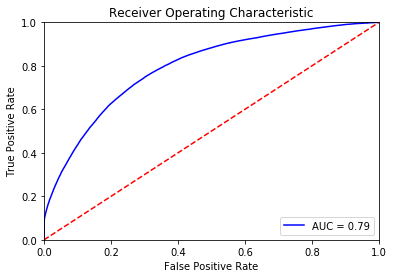

In [213]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [214]:
pred = model.predict_proba (X_test) [:,1]

In [215]:
pred = pd.DataFrame(pred)
pred.head()

,0
0,0.043427
1,0.253132
2,0.072561
3,0.033116
4,0.029731


### Saving the predicted values along with ID and Response

In [216]:
df = pd.DataFrame(pred, columns = ['ID', 'Is_Lead'],index= None)

In [217]:
df['Is_Lead'] = pred

In [218]:
df.head()

,ID,Is_Lead
0,NaN,0.043427
1,NaN,0.253132
2,NaN,0.072561
3,NaN,0.033116
4,NaN,0.029731


In [219]:
df.shape

(105312, 2)

In [220]:
data_test = pd.read_csv(r"C:\Users\Admin\Downloads\test_set.csv")

In [221]:
Id = data_test["ID"]

In [222]:
df["ID"] = Id

In [223]:
df.head()

,ID,Is_Lead
0,VBENBARO,0.043427
1,CCMEWNKY,0.253132
2,VK3KGA9M,0.072561
3,TT8RPZVC,0.033116
4,SHQZEYTZ,0.029731


In [224]:
df.shape

(105312, 2)

In [225]:
df.to_csv('AV_bank_lead_prediction(7).csv', index = False) 